In [3]:
!pip3 install plotly

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import sklearn
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Final Project: COVID 19

The purpose of this project is to carry through a data science workflow and put into practice what you have learned in this course in a more open-ended setting than the assignments.

## Due Date

This assignment is due **Wednesday, May 13th at 11:59pm PST.**

**Collaborators:** Benjamin Chou, Chris Wang, Chen Feng Tsai

# Section 1: Exploratory Data Analysis

In [5]:
counties = pd.read_csv("abridged_couties.csv")
selected_columns = ['']
counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [7]:
confirmed = pd.read_csv("time_series_covid19_confirmed_US.csv")
confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,1,1,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,370,429,472,472,514,550


# Confirmed cases slopes in different counties

We want to see how fast is the spreading rate corresponding to different counties.

In [8]:
cleaned_counties = confirmed.drop([ 'iso3', 'code3', 'FIPS','Country_Region', 'Lat', 'Long_', 
                                  'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20','2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20'], axis = 1).dropna()


cleaned_counties = cleaned_counties.rename(columns = {'Admin2': 'County'})
cleaned_counties = cleaned_counties[cleaned_counties['4/18/20'] >1000]

cleaned_counties = cleaned_counties.sort_values(by = '4/18/20', ascending = False)
cleaned_counties = cleaned_counties.reset_index(drop = True)
cleaned_counties

,UID,iso2,County,Province_State,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,84036061,US,New York,New York,11,11,12,19,25,55,...,87028,92384,98308,103208,106763,110465,118302,123146,127352,135572
1,84036059,US,Nassau,New York,1,4,5,17,19,28,...,20140,21512,22584,23553,24358,25250,26715,27772,28539,29180
2,84036103,US,Suffolk,New York,0,0,1,1,1,6,...,18803,20320,20321,20934,21643,22691,23523,24812,25035,26143
3,84036119,US,Westchester,New York,19,57,83,98,98,121,...,17004,18077,18729,19313,19786,20191,20947,21828,22476,23179
4,84017031,US,Cook,Illinois,5,6,7,7,11,22,...,11415,12472,13417,14585,15474,16323,17306,18087,19391,20395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,84048453,US,Travis,Texas,0,0,0,0,0,0,...,597,642,690,744,774,856,900,977,1074,1074
100,84013135,US,Gwinnett,Georgia,0,0,0,0,2,2,...,603,646,675,690,739,815,852,896,1017,1050
101,84042003,US,Allegheny,Pennsylvania,0,0,0,0,0,0,...,759,788,836,857,876,893,904,925,947,1009
102,84036055,US,Monroe,New York,0,0,0,0,0,0,...,698,742,767,798,823,850,884,932,975,1008


### Number of counties in different states that have more than 1000 confimed cases

In [9]:
collections.Counter(cleaned_counties['Province_State'])

Counter({'New York': 9,
         'Illinois': 4,
         'Michigan': 4,
         'New Jersey': 13,
         'California': 8,
         'Florida': 4,
         'Pennsylvania': 10,
         'Massachusetts': 8,
         'Connecticut': 3,
         'Louisiana': 4,
         'Washington': 3,
         'Texas': 4,
         'Indiana': 2,
         'Maryland': 5,
         'Nevada': 1,
         'Rhode Island': 2,
         'District of Columbia': 1,
         'Arizona': 1,
         'Missouri': 1,
         'Wisconsin': 1,
         'Georgia': 5,
         'Tennessee': 2,
         'Colorado': 2,
         'Virginia': 1,
         'Utah': 1,
         'Ohio': 2,
         'South Dakota': 1,
         'Delaware': 1,
         'North Carolina': 1})

In [10]:
from datetime import datetime
dates = [datetime.strptime(s, '%m/%d/%y') for s in cleaned_counties.iloc[0, 4:].index]

In [11]:
counties_cases = pd.DataFrame({'Date': dates})

In [12]:
for i in range(len(cleaned_counties)):
    county = cleaned_counties.loc[i]['County']
    cases = cleaned_counties.iloc[i, 4:].values
    counties_cases[county] = cases

Calculate the slope of the confirmed rate in order to get the spreading rate.

In [13]:
rate = []
for i in range(1, 98):
    new = (counties_cases.iloc[:,i: i+1].values.item(43) - counties_cases.iloc[:,i: i+1].values.item(0))/43
    rate = np.append(rate, new)
    i += 1
rate

array([3152.58139535,  678.58139535,  178.90697674,  538.60465116,
        474.18604651,  313.27906977,  282.81395349,  279.25581395,
        231.53488372,  114.27906977,  213.27906977,  210.34883721,
        209.62790698,  208.34883721,  177.30232558,  184.55813953,
        171.23255814,   27.44186047,  140.02325581,  138.44186047,
        128.90697674,  112.65116279,  110.30232558,  108.13953488,
        105.76744186,  105.30232558,   98.86046512,   92.65116279,
         89.25581395,   85.04651163,   84.25581395,   74.3255814 ,
         73.48837209,   68.65116279,   67.        ,   55.8372093 ,
         62.81395349,   62.51162791,   62.        ,   57.88372093,
         57.13953488,   54.04651163,   53.86046512,   53.09302326,
         52.41860465,   51.51162791,   51.18604651,   50.30232558,
         50.11627907,   49.79069767,   49.72093023,   48.23255814,
         25.46511628,   48.02325581,   47.72093023,   47.04651163,
         44.60465116,   43.02325581,   40.65116279,   39.81395

In [14]:
counties_cases

,Date,New York,Nassau,Suffolk,Westchester,Cook,Wayne,Bergen,Los Angeles,Hudson,...,San Francisco,Alameda,Lancaster,Cobb,Pierce,Travis,Gwinnett,Allegheny,Monroe,Anne Arundel
0,2020-03-06,11,1,3,19,5,0,2,13,0,...,2,1,0,0,0,0,0,0,0,0
1,2020-03-07,11,4,3,57,6,0,4,14,0,...,9,2,0,1,1,0,0,0,0,0
2,2020-03-08,12,5,8,83,7,0,4,14,1,...,9,2,0,1,4,0,0,0,0,0
3,2020-03-09,19,17,8,98,7,0,4,14,1,...,9,2,0,3,4,0,0,0,0,0
4,2020-03-10,25,19,10,98,11,0,7,20,1,...,14,3,0,4,4,0,2,0,0,0
5,2020-03-11,55,28,20,121,22,1,11,27,1,...,14,5,0,7,14,0,2,0,0,0
6,2020-03-12,95,41,22,148,27,1,13,32,1,...,18,5,0,8,17,0,2,0,2,0
7,2020-03-13,154,51,26,158,40,2,15,40,4,...,23,7,0,8,19,2,2,0,1,1
8,2020-03-14,269,68,27,172,50,6,25,53,5,...,28,11,0,15,26,3,2,2,2,1
9,2020-03-15,269,79,27,178,50,8,25,53,5,...,28,11,0,19,26,3,4,2,2,2


Draw the plot of the counties with top ten confirmed cases.

<AxesSubplot:xlabel='Date'>

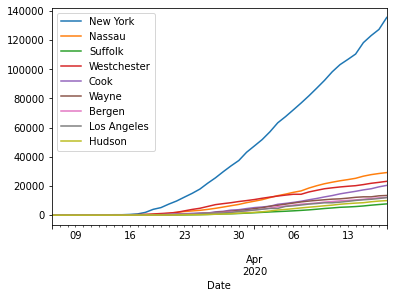

In [15]:
counties_cases.iloc[:,: 10].plot('Date')

### We decide to predict the possible spreading rate by fitting some of the possible features. 
### Beforehand, we need to find the right features.

Picking the potential features by trying out its correlation between the number of confirmed cases. We combine the age gap and picking some of the features such as chronic disease, and merge the county information with the confirmed rates together. Then we test their correlation by using the counties with top ten confirmed rates.

In [16]:
counties["MaleAge<10"] = counties["PopMale<52010"] + counties["PopMale5-92010"]
counties["MaleAge10-19"] = counties["PopMale10-142010"] + counties["PopMale15-192010"]
counties["MaleAge20-34"] = counties["PopMale20-242010"] + counties["PopMale25-292010"] + counties["PopMale30-342010"] 
counties["MaleAge35-54"] = counties["PopMale35-442010"] + counties["PopMale45-542010"] 
counties["MaleAge55-74"] = counties["PopMale55-592010"] + counties["PopMale60-642010"] + counties["PopMale65-742010"]
counties["MaleAge>74"] = counties["PopMale75-842010"] + counties["PopMale>842010"]

counties["FmleAge<10"] = counties["PopFmle<52010"] + counties["PopFmle5-92010"]
counties["FmleAge10-19"] = counties["PopFmle10-142010"] + counties["PopFmle15-192010"]
counties["FmleAge20-34"] = counties["PopFmle20-242010"] + counties["PopFmle25-292010"] + counties["PopFmle30-342010"] 
counties["FmleAge35-54"] = counties["PopFmle35-442010"] + counties["PopFmle45-542010"] 
counties["FmleAge55-74"] = counties["PopFmle55-592010"] + counties["PopFmle60-642010"] + counties["PopFmle65-742010"]
counties["FmleAge>74"] = counties["PopFmle75-842010"] + counties["PopFmle>842010"]

In [17]:
counties = counties.loc[:, ["CountyName", "State", "PopTotalMale2017", "PopTotalFemale2017", "PopulationEstimate2018", "DiabetesPercentage", 
                 "HeartDiseaseMortality", "StrokeMortality", "Smokers_Percentage", "RespMortalityRate2014", "MaleAge<10", "MaleAge10-19",
                "MaleAge20-34", "MaleAge35-54", "MaleAge55-74", "MaleAge>74", "FmleAge<10", "FmleAge10-19", "FmleAge20-34", 
                 "FmleAge35-54","FmleAge55-74", "FmleAge>74",'PopulationDensityperSqMile2010', '#EligibleforMedicare2018', 'SVIPercentile']]
counties


,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,MaleAge>74,FmleAge<10,FmleAge10-19,FmleAge20-34,FmleAge35-54,FmleAge55-74,FmleAge>74,PopulationDensityperSqMile2010,#EligibleforMedicare2018,SVIPercentile
0,Autauga,Alabama,27007.0,28497.0,55601.0,9.9,204.5,56.1,18.081557,81.79,...,1000.0,3703.0,4196.0,4891.0,8430.0,5249.0,1533.0,91.8,11439.0,0.4354
1,Baldwin,Alabama,103225.0,109403.0,218022.0,8.5,183.2,41.9,17.489033,54.28,...,5555.0,11311.0,11520.0,15112.0,25807.0,22109.0,7210.0,114.7,54145.0,0.2162
2,Barbour,Alabama,13335.0,11935.0,24881.0,15.7,220.4,49.0,21.999985,69.82,...,627.0,1671.0,1591.0,2190.0,3367.0,3018.0,1044.0,31.0,6681.0,0.9959
3,Bibb,Alabama,12138.0,10530.0,22400.0,13.3,225.5,57.2,19.114200,84.49,...,443.0,1312.0,1406.0,1929.0,2990.0,2237.0,740.0,36.8,5128.0,0.6003
4,Blount,Alabama,28607.0,29406.0,57840.0,14.9,224.8,52.8,19.208672,87.05,...,1336.0,3755.0,3865.0,4942.0,7920.0,6454.0,2024.0,88.9,13175.0,0.4242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,Kalawao,NaN,42.0,46.0,88.0,6.5,124.5,28.5,12.195113,32.05,...,3.0,0.0,0.0,7.0,10.0,15.0,16.0,7.5,NaN,0.3162
3240,Ciales Municipio,NaN,8051.0,8576.0,15918.0,16.0,NaN,26.3,NaN,NaN,...,477.0,1199.0,1474.0,1915.0,2548.0,1796.0,584.0,282.3,5152.0,NaN
3241,Humacao Municipio,NaN,24835.0,27936.0,50532.0,14.4,108.4,24.1,NaN,NaN,...,1378.0,3501.0,4238.0,5921.0,8104.0,6907.0,2041.0,1306.4,19035.0,NaN
3242,New York City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
confirmed = confirmed.loc[:, ["Admin2", "Province_State", "2/1/20", "2/11/20", "2/21/20", "3/1/20", "3/11/20", "3/21/20", "4/1/20", "4/11/20", "4/18/20"]]
confirmed["CountyName"] = confirmed["Admin2"]
confirmed["State"] = confirmed["Province_State"]

In [19]:
confirmed = confirmed.drop("Admin2", axis = 1).drop("Province_State", axis = 1)


In [20]:
confirmed.columns

Index(['2/1/20', '2/11/20', '2/21/20', '3/1/20', '3/11/20', '3/21/20',
       '4/1/20', '4/11/20', '4/18/20', 'CountyName', 'State'],
      dtype='object')

In [21]:
combine = pd.merge(counties, confirmed, how = "inner", on = ["CountyName", "State"])

In [22]:
counties.columns

Index(['CountyName', 'State', 'PopTotalMale2017', 'PopTotalFemale2017',
       'PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'MaleAge<10', 'MaleAge10-19', 'MaleAge20-34', 'MaleAge35-54',
       'MaleAge55-74', 'MaleAge>74', 'FmleAge<10', 'FmleAge10-19',
       'FmleAge20-34', 'FmleAge35-54', 'FmleAge55-74', 'FmleAge>74',
       'PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile'],
      dtype='object')

In [23]:
combine.columns

Index(['CountyName', 'State', 'PopTotalMale2017', 'PopTotalFemale2017',
       'PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'MaleAge<10', 'MaleAge10-19', 'MaleAge20-34', 'MaleAge35-54',
       'MaleAge55-74', 'MaleAge>74', 'FmleAge<10', 'FmleAge10-19',
       'FmleAge20-34', 'FmleAge35-54', 'FmleAge55-74', 'FmleAge>74',
       'PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile', '2/1/20', '2/11/20', '2/21/20', '3/1/20', '3/11/20',
       '3/21/20', '4/1/20', '4/11/20', '4/18/20'],
      dtype='object')

In [24]:
selected_counties = cleaned_counties.loc[:10]['County'] + ", " + cleaned_counties.loc[:10]['Province_State']
selected_counties

0          New York, New York
1            Nassau, New York
2           Suffolk, New York
3       Westchester, New York
4              Cook, Illinois
5             Wayne, Michigan
6          Bergen, New Jersey
7     Los Angeles, California
8          Hudson, New Jersey
9           Essex, New Jersey
10         Rockland, New York
dtype: object

In [25]:
combine['County'] = combine['CountyName'] + ", " + combine['State']

In [26]:
combine['Male>55Frac'] = (combine['MaleAge55-74'] + combine['MaleAge>74'])/combine['PopulationEstimate2018']
combine['Fmle>55Frac'] = (combine['MaleAge55-74'] + combine['FmleAge>74'])/combine['PopulationEstimate2018']

In [27]:
combine

,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,2/21/20,3/1/20,3/11/20,3/21/20,4/1/20,4/11/20,4/18/20,County,Male>55Frac,Fmle>55Frac
0,Autauga,Alabama,27007.0,28497.0,55601.0,9.9,204.5,56.1,18.081557,81.79,...,0,0,0,0,8,19,25,"Autauga, Alabama",0.101149,0.110735
1,Baldwin,Alabama,103225.0,109403.0,218022.0,8.5,183.2,41.9,17.489033,54.28,...,0,0,0,2,20,66,109,"Baldwin, Alabama",0.118263,0.125854
2,Barbour,Alabama,13335.0,11935.0,24881.0,15.7,220.4,49.0,21.999985,69.82,...,0,0,0,0,0,9,18,"Barbour, Alabama",0.139183,0.155942
3,Bibb,Alabama,12138.0,10530.0,22400.0,13.3,225.5,57.2,19.114200,84.49,...,0,0,0,0,3,13,26,"Bibb, Alabama",0.118929,0.132188
4,Blount,Alabama,28607.0,29406.0,57840.0,14.9,224.8,52.8,19.208672,87.05,...,0,0,0,0,5,12,20,"Blount, Alabama",0.125121,0.137016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,Uinta,Wyoming,10335.0,10160.0,20299.0,10.5,184.6,32.0,17.212675,81.51,...,0,0,0,0,0,4,6,"Uinta, Wyoming",0.109316,0.112567
3020,Washakie,Wyoming,4075.0,3989.0,7885.0,9.3,157.1,31.4,16.859400,59.36,...,0,0,0,0,1,5,5,"Washakie, Wyoming",0.166772,0.177172
3021,Weston,Wyoming,3634.0,3293.0,6967.0,7.2,149.3,29.5,16.693134,81.68,...,0,0,0,0,0,0,0,"Weston, Wyoming",0.156021,0.167647
3022,Broomfield,Colorado,33991.0,34350.0,69267.0,6.5,113.8,34.5,11.625378,57.93,...,0,0,0,1,20,68,98,"Broomfield, Colorado",0.076111,0.085033


In [28]:
top10 = combine[combine['County'].isin(selected_counties)]
top10 

,CountyName,State,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,...,2/21/20,3/1/20,3/11/20,3/21/20,4/1/20,4/11/20,4/18/20,County,Male>55Frac,Fmle>55Frac
172,Los Angeles,California,5009834.0,5153673.0,10105518.0,8.1,150.8,33.9,10.847678,34.94,...,1,1,27,292,3518,8453,12021,"Los Angeles, California",0.092515,0.102951
566,Cook,Illinois,2530605.0,2680658.0,5180493.0,9.0,175.1,38.7,13.776183,41.02,...,2,3,22,548,5152,13417,20395,"Cook, Illinois",0.100399,0.115284
1244,Wayne,Michigan,844123.0,909493.0,1753893.0,10.3,259.2,40.9,21.055530,53.48,...,0,0,1,102,4470,10951,13471,"Wayne, Michigan",0.112196,0.129467
1699,Bergen,New Jersey,460107.0,488299.0,936692.0,6.8,140.1,27.3,11.410987,29.49,...,0,0,11,363,3494,9362,12163,"Bergen, New Jersey",0.119324,0.136699
1704,Essex,New Jersey,388841.0,419444.0,799767.0,9.9,169.8,32.5,14.235389,33.96,...,0,0,0,107,2262,7007,9901,"Essex, New Jersey",0.094259,0.109807
1706,Hudson,New Jersey,343699.0,347944.0,676061.0,8.2,157.6,30.3,15.382038,34.89,...,0,0,1,97,1910,6851,9956,"Hudson, New Jersey",0.082256,0.094104
1781,Nassau,New York,666014.0,703500.0,1358343.0,7.2,188.2,23.3,11.225365,29.03,...,0,0,28,1234,9554,22584,29180,"Nassau, New York",0.123788,0.142027
1782,New York,New York,789070.0,875657.0,1628701.0,6.5,143.5,18.9,12.418234,23.47,...,0,0,55,7530,47439,98308,135572,"New York, New York",0.102499,0.117752
1795,Rockland,New York,161115.0,167753.0,325695.0,6.9,150.9,25.2,12.165288,33.58,...,0,0,6,262,3321,7477,9171,"Rockland, New York",0.107650,0.121101
1802,Suffolk,New York,735331.0,757622.0,1481093.0,6.8,181.8,25.3,12.625481,38.59,...,0,0,6,662,7605,20321,26143,"Suffolk, New York",0.115934,0.129903


In [29]:
c = combine.sort_values(by = 'PopulationEstimate2018', ascending = False).reset_index(drop = True)


In [30]:
def possible_factor(name):
    sort = combine.sort_values(by = name, ascending = False).reset_index(drop = True)
    print(f'rank of {name} of top 10 counties')
    print(f'total counties: {len(sort)}')
    for c in top10['County']:
        rank = list(sort['County']).index(c)
        print(f'{c} : {rank}')

In [31]:
possible_factor('Male>55Frac')

rank of Male>55Frac of top 10 counties
total counties: 3024
Los Angeles, California : 2777
Cook, Illinois : 2640
Wayne, Michigan : 2370
Bergen, New Jersey : 2130
Essex, New Jersey : 2745
Hudson, New Jersey : 2899
Nassau, New York : 1980
New York, New York : 2593
Rockland, New York : 2483
Suffolk, New York : 2255
Westchester, New York : 2291


In [32]:
factors = ['PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'PopulationDensityperSqMile2010', '#EligibleforMedicare2018',
       'SVIPercentile','Male>55Frac', 'Fmle>55Frac']


From the ranking corresponding to different features and different counties, we can inferring the correlation between the features and the infection rate.

In [33]:
for f in factors:
    possible_factor(f)
    print()

rank of PopulationEstimate2018 of top 10 counties
total counties: 3024
Los Angeles, California : 0
Cook, Illinois : 1
Wayne, Michigan : 18
Bergen, New Jersey : 52
Essex, New Jersey : 74
Hudson, New Jersey : 93
Nassau, New York : 29
New York, New York : 20
Rockland, New York : 205
Suffolk, New York : 25
Westchester, New York : 47

rank of DiabetesPercentage of top 10 counties
total counties: 3024
Los Angeles, California : 2159
Cook, Illinois : 1825
Wayne, Michigan : 1356
Bergen, New Jersey : 2542
Essex, New Jersey : 1502
Hudson, New Jersey : 2117
Nassau, New York : 2435
New York, New York : 2621
Rockland, New York : 2498
Suffolk, New York : 2560
Westchester, New York : 2640

rank of HeartDiseaseMortality of top 10 counties
total counties: 3024
Los Angeles, California : 2380
Cook, Illinois : 1643
Wayne, Michigan : 191
Bergen, New Jersey : 2659
Essex, New Jersey : 1803
Hudson, New Jersey : 2184
Nassau, New York : 1260
New York, New York : 2566
Rockland, New York : 2374
Suffolk, New York :

We then use scatter plots and regression lines to support the features we are going to pick. To prevent bias, we use percentage of the confirm rate instead of the number of the confirmed cases to analyze. We also set the thershold for the number of the confirmed cases at 1000 to prevent the effect of small numbers.

In [34]:
combine['Confirmed%'] = combine['4/18/20'] /combine['PopulationEstimate2018']
combine[combine['County'].isin(selected_counties)]['Confirmed%']

172     0.001190
566     0.003937
1244    0.007681
1699    0.012985
1704    0.012380
1706    0.014726
1781    0.021482
1782    0.083239
1795    0.028158
1802    0.017651
1810    0.023955
Name: Confirmed%, dtype: float64

In [35]:
newc = combine[combine['4/18/20'] > 1000].sort_values(by = '4/18/20', ascending = False).reset_index(drop = True).iloc[1:, :]

In [36]:
factors

['PopulationEstimate2018',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 'PopulationDensityperSqMile2010',
 '#EligibleforMedicare2018',
 'SVIPercentile',
 'Male>55Frac',
 'Fmle>55Frac']

In [37]:
def plot_factor(factor):
    sns.regplot(x=factor, y='Confirmed%', data=newc)

### Plotting every feature

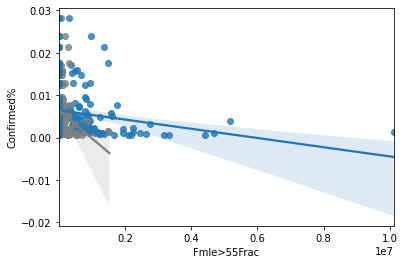

In [38]:
for f in factors:
    plot_factor(f)

### Plot the feature, PopulationEstimate2018

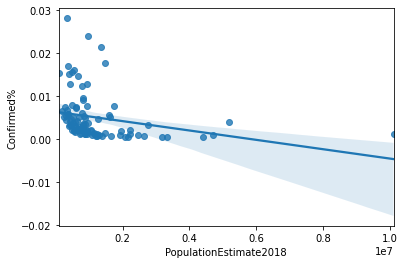

In [39]:
plot_factor(factors[0])

### Plot the feature, DiabetesPercentage

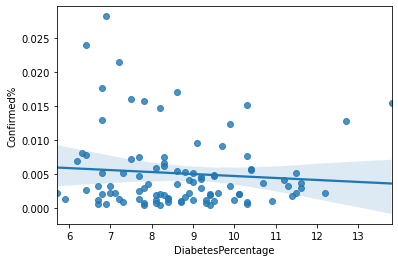

In [40]:
plot_factor(factors[1])

### Plot the feature, HeartDiseaseMortality

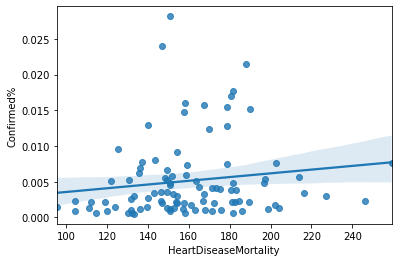

In [41]:
plot_factor(factors[2])

### Plot the feature, StrokeMortality

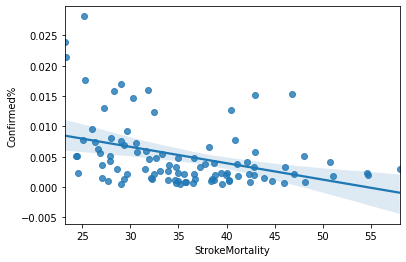

In [42]:
plot_factor(factors[3])

### Plot the feature, Smokers_Percentage

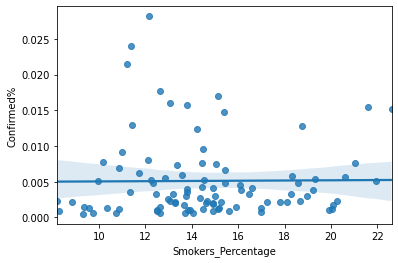

In [43]:
plot_factor(factors[4])

### Plot the feature, RespMortalityRate2014

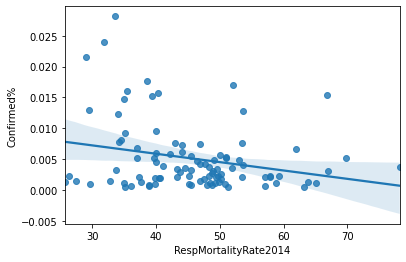

In [44]:
plot_factor(factors[5])

###  Plot the feature, PopulationDensitySqMile2010

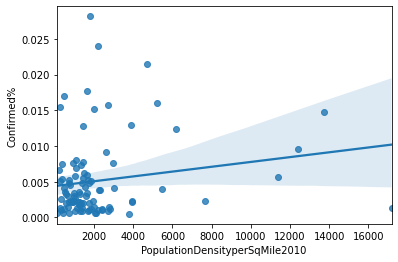

In [45]:
plot_factor(factors[6])

### Plot the feature, #EligibleforMedicare2018

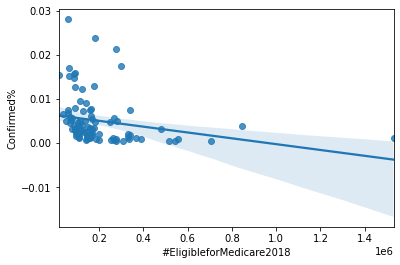

In [46]:
plot_factor(factors[7])

### Plot the feature, SVIPercentile

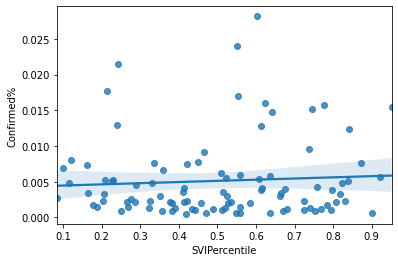

In [47]:
plot_factor(factors[8])

### Plot the feature, MaleAge>55Fraction 

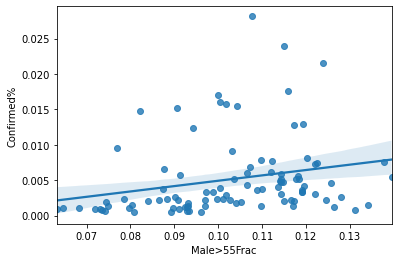

In [48]:
plot_factor(factors[9])

### Plot the feature, FmleAge>55Fraction

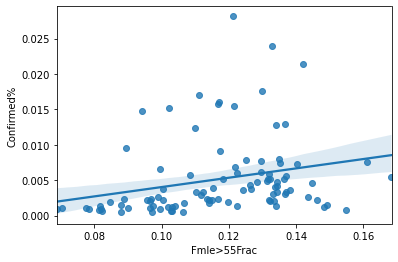

In [49]:
plot_factor(factors[10])

We realize that the effective factors will be the density of population and the advanced ages, whether male or female. Although it seems that the correlation only happens at those two factors, we still put chronic disease under consideration.

## Section 2: Fitting Model and Prediction

First, we organize the required data and create a new dataframe.

In [50]:
data = combine.loc[:, ['County', 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'PopulationDensityperSqMile2010'
       ,'Male>55Frac', 'Fmle>55Frac','Confirmed%']]
date = data.sort_values(by = 'Confirmed%', ascending = False)

In [51]:
Y = data['Confirmed%']
X_features = data[[ 'DiabetesPercentage', 'HeartDiseaseMortality',
       'StrokeMortality', 'Smokers_Percentage', 'RespMortalityRate2014',
       'PopulationDensityperSqMile2010','Male>55Frac', 'Fmle>55Frac']]
X_features

,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,PopulationDensityperSqMile2010,Male>55Frac,Fmle>55Frac
0,9.9,204.5,56.1,18.081557,81.79,91.8,0.101149,0.110735
1,8.5,183.2,41.9,17.489033,54.28,114.7,0.118263,0.125854
2,15.7,220.4,49.0,21.999985,69.82,31.0,0.139183,0.155942
3,13.3,225.5,57.2,19.114200,84.49,36.8,0.118929,0.132188
4,14.9,224.8,52.8,19.208672,87.05,88.9,0.125121,0.137016
...,...,...,...,...,...,...,...,...
3019,10.5,184.6,32.0,17.212675,81.51,10.2,0.109316,0.112567
3020,9.3,157.1,31.4,16.859400,59.36,3.8,0.166772,0.177172
3021,7.2,149.3,29.5,16.693134,81.68,3.0,0.156021,0.167647
3022,6.5,113.8,34.5,11.625378,57.93,1691.9,0.076111,0.085033


In [52]:
def add_bias(data):
    return data.insert(0, 'ones', [1] * data.shape[0])
X = X_features.copy() 
add_bias(X)
X
X = X.fillna(0)

We need a loss function to evalouate how good our model predict. We also need a linear model function to compute the prediction $\hat{\mathbb{Y}}$ given parameters $\theta$ and covariate matrix $\mathbb{X}$.

In [53]:
def avg_squared_loss(y, y_hat):
    return np.mean((y  - y_hat) ** 2)
def linear_model(theta, X): 
    return X @ theta

Then we decide to import LinearRegression model from sklearn to fit our model to find the optimal $\theta$.

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression(fit_intercept = True)
model.fit(X, Y)
Y_hat = model.predict(X)
loss1 = avg_squared_loss(Y, Y_hat)
loss1

3.5551000362441473e-06

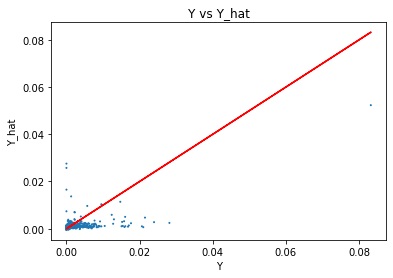

In [56]:
Y_s = [1 for _ in range(len(Y))]
plt.scatter(Y, Y_hat, s = Y_s)
plt.plot(Y, Y, c = 'r') # the identity line
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title('Y vs Y_hat')
plt.show()

## Section 3: Train Test Split

We at first shuffle the data to decrease bias.

In [57]:
shuffled = data.sample(frac=1., random_state=42)
shuffled

,County,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,PopulationDensityperSqMile2010,Male>55Frac,Fmle>55Frac,Confirmed%
3015,"Sheridan, Wyoming",7.7,175.1,38.8,15.214185,75.13,11.5,0.147124,0.159065,0.000397
251,"Mineral, Colorado",3.7,142.6,28.0,12.747824,54.87,0.8,0.213918,0.217784,0.002577
1709,"Middlesex, New Jersey",9.7,154.3,29.7,10.970468,35.07,2621.6,0.103126,0.117326,0.009189
1609,"Frontier, Nebraska",8.7,136.7,29.8,13.852093,46.19,2.8,0.173313,0.182515,0.000000
1018,"Marshall, Kentucky",8.5,243.2,44.2,19.052656,84.73,104.4,0.160078,0.172486,0.000385
...,...,...,...,...,...,...,...,...,...,...
1638,"Merrick, Nebraska",13.1,138.8,34.2,15.550875,61.28,16.2,0.152076,0.169145,0.000776
1095,"Ouachita, Louisiana",13.2,180.5,41.6,21.431657,69.01,251.8,0.101842,0.116155,0.003127
1130,"Allegany, Maryland",13.2,238.6,39.6,16.051711,61.75,177.0,0.146178,0.168637,0.000465
1294,"Morrison, Minnesota",8.5,120.5,33.1,15.353482,45.97,29.5,0.136694,0.152914,0.000000


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(shuffled, test_size=0.1, random_state=83)

In [60]:
train

,County,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,PopulationDensityperSqMile2010,Male>55Frac,Fmle>55Frac,Confirmed%
2562,"Jasper, Texas",9.7,236.2,54.8,16.262372,82.94,38.0,0.137823,0.148054,0.000251
903,"Norton, Kansas",9.1,165.1,30.3,16.666753,56.17,6.5,0.153959,0.171823,0.000000
734,"Wells, Indiana",9.1,174.4,37.0,18.740270,64.83,75.1,0.125895,0.144934,0.000177
2681,"Webb, Texas",6.9,147.2,40.2,18.426032,30.32,74.5,0.060259,0.067689,0.000917
17,"Conecuh, Alabama",23.7,233.5,60.4,21.107513,76.40,15.6,0.162988,0.179848,0.000815
...,...,...,...,...,...,...,...,...,...,...
454,"Newton, Georgia",16.8,182.2,46.3,17.091541,69.92,367.3,0.081358,0.089811,0.001105
165,"Humboldt, California",7.9,175.0,66.0,14.468508,70.47,37.7,0.128112,0.140064,0.000381
2763,"Cumberland, Virginia",13.2,163.1,37.4,18.555146,49.38,33.8,0.144051,0.157305,0.001019
2768,"Fauquier, Virginia",7.5,131.7,33.2,13.920192,50.06,100.7,0.114694,0.122787,0.000509


In [61]:
test

,County,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,PopulationDensityperSqMile2010,Male>55Frac,Fmle>55Frac,Confirmed%
101,"Drew, Arkansas",18.0,265.2,48.9,20.831700,61.22,22.3,0.123090,0.138149,0.000327
1323,"Wabasha, Minnesota",5.6,142.7,32.8,14.045103,47.37,41.5,0.150289,0.161562,0.000370
2871,"Whitman, Washington",8.9,153.8,41.4,14.884558,46.52,20.7,0.075696,0.081782,0.000301
2741,"Alleghany, Virginia",13.2,187.3,39.6,16.914677,68.08,36.5,0.181355,0.205231,0.000268
2428,"Stewart, Tennessee",8.5,243.7,47.3,20.703662,94.11,29.0,0.145491,0.156109,0.000369
...,...,...,...,...,...,...,...,...,...,...
185,"Plumas, California",7.8,170.2,39.8,11.489556,71.37,7.8,0.213306,0.222453,0.000213
2000,"Highland, Ohio",12.2,235.6,46.3,21.027983,90.39,78.8,0.127967,0.142041,0.000163
1790,"Otsego, New York",8.0,180.3,30.4,15.505931,61.86,62.2,0.146965,0.163651,0.000787
1824,"Burke, North Carolina",7.0,186.6,48.7,17.303198,75.22,179.3,0.134219,0.151933,0.000730


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

First, we only add population density as the only feature.

In [63]:
model = Pipeline([
    ("SelectColumns", ColumnTransformer([("keep", "passthrough", ["PopulationDensityperSqMile2010"])])),
    ("LinearModel", LinearRegression())
])

In [64]:
model['SelectColumns']

ColumnTransformer(transformers=[('keep', 'passthrough',
                                 ['PopulationDensityperSqMile2010'])])

In [65]:
model.fit(train, train["Confirmed%"])

Pipeline(steps=[('SelectColumns',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['PopulationDensityperSqMile2010'])])),
                ('LinearModel', LinearRegression())])

In [66]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [67]:
Y_hat1 = model.predict(train)
Y1 = train['Confirmed%']
print("Training Error (RMSE):", rmse(Y1, Y_hat1))

Training Error (RMSE): 0.001884656079973928


In [68]:
models = {"p": model}

Second, we add the fraction of the advanced age to fit the model.

In [69]:
from sklearn.preprocessing import FunctionTransformer

def compute_volume(X):
    return np.expand_dims(X[:,0] / X[:,0]  , axis=1)

volume_transformer = FunctionTransformer(compute_volume, validate=True)

In [70]:
quantitative_features = ['PopulationDensityperSqMile2010','Male>55Frac','Fmle>55Frac']
model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", quantitative_features),
        ("pop_vol", volume_transformer, ["PopulationDensityperSqMile2010"])])),
    ("LinearModel", LinearRegression())
])

In [71]:
model.fit(train, train['Confirmed%'])

Pipeline(steps=[('SelectColumns',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['PopulationDensityperSqMile2010',
                                                   'Male>55Frac',
                                                   'Fmle>55Frac']),
                                                 ('pop_vol',
                                                  FunctionTransformer(func=<function compute_volume at 0x12c26f1f0>,
                                                                      validate=True),
                                                  ['PopulationDensityperSqMile2010'])])),
                ('LinearModel', LinearRegression())])

In [72]:
Y_hat2 = model.predict(train)
Y2 = train['Confirmed%']
print("Training Error (RMSE):", rmse(Y2, Y_hat2))

Training Error (RMSE): 0.0018750210988032901


In [73]:
models['p+55'] = model

Third, we add all the chronic disease into consideration.

In [74]:
try:
    model.fit(train, train['Confirmed%'])
except ValueError as err:
    print(err)

In [75]:
quantitative_features = ['DiabetesPercentage', 'HeartDiseaseMortality',
        'Smokers_Percentage', 'RespMortalityRate2014',
       'PopulationDensityperSqMile2010'
       ,'Male>55Frac', 'Fmle>55Frac']
model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", quantitative_features),
        ("pop_vol", volume_transformer, ["PopulationDensityperSqMile2010"])])),
    ("LinearModel", LinearRegression())
])

In [76]:
model.fit(train, train['Confirmed%'])

Pipeline(steps=[('SelectColumns',
                 ColumnTransformer(transformers=[('keep', 'passthrough',
                                                  ['DiabetesPercentage',
                                                   'HeartDiseaseMortality',
                                                   'Smokers_Percentage',
                                                   'RespMortalityRate2014',
                                                   'PopulationDensityperSqMile2010',
                                                   'Male>55Frac',
                                                   'Fmle>55Frac']),
                                                 ('pop_vol',
                                                  FunctionTransformer(func=<function compute_volume at 0x12c26f1f0>,
                                                                      validate=True),
                                                  ['PopulationDensityperSqMile2010'])])),
                ('Line

In [77]:
Y_hat3 = model.predict(train)
Y3 = train['Confirmed%']
print("Training Error (RMSE):", rmse(Y3, Y_hat3))

Training Error (RMSE): 0.0018665203698155937


In [78]:
models['p+55+others'] = model

### Cross Validation 

In [83]:
from sklearn.base import clone

def cross_validate_rmse(model):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(train):
        model.fit(train.iloc[tr_ind,:], train['Confirmed%'].iloc[tr_ind])
        rmse_values.append(rmse(train['Confirmed%'].iloc[va_ind], model.predict(train.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [84]:
cross_validate_rmse(model)

NameError: name 'KFold' is not defined

In [85]:
def compare_models(models):
    # Compute the training error for each model
    training_rmse = [rmse(train['Confirmed%'], model.predict(train)) for model in models.values()]
    # Compute the cross validation error for each model
    validation_rmse = [cross_validate_rmse(model) for model in models.values()]
    # Compute the test error for each model (don't do this!)
    test_rmse = [rmse(test['Confirmed%'], model.predict(test)) for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        go.Bar(x = names, y = training_rmse, name="Training RMSE"),
        go.Bar(x = names, y = validation_rmse, name="CV RMSE"),
        go.Bar(x = names, y = test_rmse, name="Test RMSE", opacity=.3)])
    return fig

In [86]:
fig = compare_models(models)
fig.update_yaxes()

NameError: name 'KFold' is not defined

We found that the traing error and the test error decreases as we add more features, but they only decrease a little. The reason might be that the information we have are not that powerful to determine the trend of the model. And also we can tell that the biggest factor for the high percentage of confirmed rates is still based on the population density, which means that shelter in place might still be a very effective policy.